In [3]:
# C0797202 JAY PANCHAL 

In [4]:
%pip install memory_profiler
%load_ext memory_profiler
%pip install gym
%pip install JSAnimation
%pip install matplotlib
%pip install -U gym >= 0.21.0
%pip install -U gym[atari,accept-rom-license]

%%file training.py

%%python -m memory_profiler


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
UsageError: Line magic function `%%file` not found.


In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from matplotlib import animation

from memory_profiler import profile

from JSAnimation.IPython_display import display_animation
from IPython.display import HTML

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 144)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    HTML(anim.to_jshtml())

## Initiating Ping Pong 

In [6]:
# Importing gym library and creating environment
import gym
env = gym.make('Pong-v0')

c:\Users\jaypanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment Pong-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
c:\Users\jaypanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\jaypanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [7]:
env.action_space
env.observation_space

Box(0, 255, (210, 160, 3), uint8)

In [8]:
# Run a demo of the environment
observation = env.reset()
cumulated_reward = 0

frames = []
for t in range(1000):
#     print(observation)
    frames.append(env.render(mode = 'rgb_array'))
    # very stupid agent, just makes a random action within the allowd action space
    action = env.action_space.sample()
#     print("Action: {}".format(t+1))    
    observation, reward, done, info = env.step(action)
#     print(reward)
    cumulated_reward += reward
    if done:
        print("Episode finished after {} timesteps, accumulated reward = {}".format(t+1, cumulated_reward))
        break
print("Episode finished without success, accumulated reward = {}".format(cumulated_reward))

env.close()

c:\Users\jaypanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
c:\Users\jaypanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:297: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
c:\Users\jaypanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


Episode finished without success, accumulated reward = -18.0


In [9]:
def sigmoid(x): 
  return 1.0 / (1.0 + np.exp(-x)) # sigmoid "squashing" function to interval [0,1]

def prepro(I):
  """ prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector """
  I = I[35:195] # crop
  I = I[::2,::2,0] # downsample by factor of 2
  I[I == 144] = 0 # erase background (background type 1)
  I[I == 109] = 0 # erase background (background type 2)
  I[I != 0] = 1 # everything else (paddles, ball) just set to 1
  return I.astype(np.float).ravel()

def policy_forward(x):
  h = np.dot(model['W1'], x)
  h[h<0] = 0 # ReLU nonlinearity
  logp = np.dot(model['W2'], h)
  p = sigmoid(logp)
  return p, h # return probability of taking action 2, and hidden state

def model_step(model, observation, prev_x):
  # preprocess the observation, set input to network to be difference image
  cur_x = prepro(observation)
  x = cur_x - prev_x if prev_x is not None else np.zeros(D)
  prev_x = cur_x
  
  # forward the policy network and sample an action from the returned probability
  aprob, _ = policy_forward(x)
  action = 2 if aprob >= 0.5 else 3 # roll the dice!
  
  return action, prev_x

def play_game(env, model):
  observation = env.reset()

  frames = []
  cumulated_reward = 0

  prev_x = None # used in computing the difference frame

  for t in range(1000):
      frames.append(env.render(mode = 'rgb_array'))
      action, prev_x = model_step(model, observation, prev_x)
      observation, reward, done, info = env.step(action)
      cumulated_reward += reward
      if done:
          print("Episode finished after {} timesteps, accumulated reward = {}".format(t+1, cumulated_reward))
          break
  print("Episode finished without success, accumulated reward = {}".format(cumulated_reward))
  display_frames_as_gif(frames)
  env.close()

# Logic behind the game

In [10]:


# Init the model

# number of neurons
H = 800 

# input dimensionality: 80x80 grid
D = 80 * 80 

model = {}
def update_neurons(neurons = 800):
    H = neurons
    
    # "Xavier" initialization
    
    model['W1'] = np.random.randn(H,D) / np.sqrt(D)
    model['W2'] = np.random.randn(H) / np.sqrt(H)

update_neurons(H)

# import pickle
#  model = pickle.load(open('model.pkl', 'rb'))

In [11]:

# hyperparameters
batch_size = 10 # every how many episodes to do a param update?

# learning_rate = 1e-4
learning_rate = 1e-4
 
# discount factor for reward
gamma = 0.99 

# decay factor for RMSProp leaky sum of grad^2
decay_rate = 0.99 
  
# update buffers that add up gradients over a batch
grad_buffer = { k : np.zeros_like(v) for k,v in model.items() } 

# rmsprop memory
rmsprop_cache = { k : np.zeros_like(v) for k,v in model.items() } 

def discount_rewards(r):
  """ take 1D float array of rewards and compute discounted reward """
  discounted_r = np.zeros_like(r, dtype=np.float32)
  running_add = 0
  for t in reversed(range(0, r.size)):
    if r[t] != 0: running_add = 0 # reset the sum, since this was a game boundary (pong specific!)
    running_add = running_add * gamma + r[t]
    discounted_r[t] = running_add
  return discounted_r

def policy_backward(epx, eph, epdlogp):
  """ backward pass. (eph is array of intermediate hidden states) """
  dW2 = np.dot(eph.T, epdlogp).ravel()
  dh = np.outer(epdlogp, model['W2'])
  dh[eph <= 0] = 0 # backpro prelu
  dW1 = np.dot(dh.T, epx)
  return {'W1':dW1, 'W2':dW2}


def train_model(env, model, total_episodes = 100):
  hist = []
  hist_2 = []
  observation = env.reset()

  prev_x = None # used in computing the difference frame
  xs,hs,dlogps,drs = [],[],[],[]
  running_reward = None
  reward_sum = 0
  episode_number = 0

  from datetime import datetime

  now = datetime.now()

  print(f'Start time: {now}')

  last_export_time = now

  while True:
    # preprocess the observation, set input to network to be difference image
    cur_x = prepro(observation)
    x = cur_x - prev_x if prev_x is not None else np.zeros(D)
    prev_x = cur_x

    # forward the policy network and sample an action from the returned probability
    aprob, h = policy_forward(x)
    action = 2 if np.random.uniform() < aprob else 3 # roll the dice!

    # record various intermediates (needed later for backprop)
    xs.append(x) # observation
    hs.append(h) # hidden state
    y = 1 if action == 2 else 0 # a "fake label"
    dlogps.append(y - aprob) # grad that encourages the action that was taken to be taken (see http://cs231n.github.io/neural-networks-2/#losses if confused)

    # step the environment and get new measurements
    observation, reward, done, info = env.step(action)
    reward_sum += reward

    drs.append(reward) # record reward (has to be done after we call step() to get reward for previous action)

    if done: # an episode finished
      episode_number += 1

      # stack together all inputs, hidden states, action gradients, and rewards for this episode
      epx = np.vstack(xs)
      eph = np.vstack(hs)
      epdlogp = np.vstack(dlogps)
      epr = np.vstack(drs)
      xs,hs,dlogps,drs = [],[],[],[] # reset array memory

      # compute the discounted reward backwards through time
      discounted_epr = discount_rewards(epr)
      # standardize the rewards to be unit normal (helps control the gradient estimator variance)
      discounted_epr -= np.mean(discounted_epr)
      discounted_epr /= np.std(discounted_epr)

      epdlogp *= discounted_epr # modulate the gradient with advantage (PG magic happens right here.)
      grad = policy_backward(epx, eph, epdlogp)
      for k in model: grad_buffer[k] += grad[k] # accumulate grad over batch

      # perform rmsprop parameter update every batch_size episodes
      if episode_number % batch_size == 0:
        for k,v in model.items():
          g = grad_buffer[k] # gradient
          rmsprop_cache[k] = decay_rate * rmsprop_cache[k] + (1 - decay_rate) * g**2
          model[k] += learning_rate * g / (np.sqrt(rmsprop_cache[k]) + 1e-5)
          grad_buffer[k] = np.zeros_like(v) # reset batch gradient buffer

      # boring book-keeping
      running_reward = reward_sum if running_reward is None else running_reward * 0.99 + reward_sum * 0.01
      hist.append((episode_number, reward_sum, running_reward,datetime.now()))
      hist_2.append((episode_number, running_reward))
      
      if ((datetime.now() - last_export_time).total_seconds() > 30):
        file_name = 'hist1_'+ str(total_episodes) + '.csv'
        np.savetxt(file_name, hist, delimiter =",", fmt ='% s')
        last_export_time = datetime.now()
        
      print (f'resetting env. episode {episode_number}, reward total was {reward_sum}. running mean: {running_reward}, timestamp: {datetime.now()}')
            
      reward_sum = 0
      observation = env.reset() # reset env
      prev_x = None
      if running_reward > -16.5:
        sys.exit()
      if episode_number == total_episodes:
        return hist, hist_2

      if reward != 0: # Pong has either +1 or -1 reward exactly when game ends.
        print (('ep %d: game finished, reward: %f' % (episode_number, reward)) + ('' if reward == -1 else ' !!!!!!!!'))

In [12]:
file_name = 'hist1_last_.csv'
#%time hist1,hist_2 = train_model(env, model, total_episodes=10000)
#np.savetxt(file_name, hist1, delimiter =",", fmt ='% s')


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


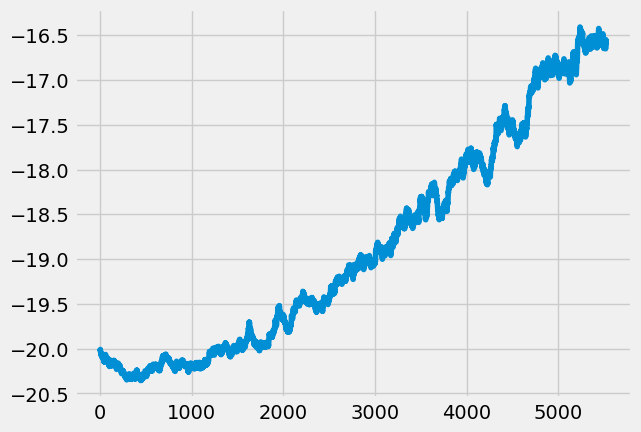

In [13]:
%pip install pandas
import pandas as pd

df = pd.read_csv('hist1_10000.csv', delimiter=',')

data = [list(row) for row in df.values]

style.use('fivethirtyeight')
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
xs = []
ys = []

def plot_graph2(data):
    for line in data:
        xs.append(float(line[0]))
        ys.append(float(line[2]))
        ax1.clear()
        
    ax1.plot(xs, ys)
    plt.pause(1)
    plt.show()

plot_graph2(data)

In [14]:
#%time hist2 = train_model(env, model, total_episodes=12000)

In [15]:
#play_game(env, model)

In [16]:
#%time hist3 = train_model(env, model, total_episodes=1500)

In [17]:
#play_game(env, model)